# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your Ames Housing data model using a train-test split.

## Objectives

You will be able to:

* Perform a train-test split
* Prepare training and testing data for modeling
* Compare training and testing errors to determine if model is over or underfitting

## Let's Use Our Ames Housing Data Again!

We included the code to load the data below.

In [1]:
# Run this cell without changes
import pandas as pd
import numpy as np
ames = pd.read_csv('ames.csv', index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


## Perform a Train-Test Split

Use `train_test_split` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) with the default split size. At the end you should have `X_train`, `X_test`, `y_train`, and `y_test` variables, where `y` represents `SalePrice` and `X` represents all other columns. It is also important to set a random state so that your results will be repeatable. 

In [2]:
# Your code here: split the data into training and test sets
from sklearn.model_selection import train_test_split
y = ames["SalePrice"] #target
X = ames.drop("SalePrice", axis = 1) #predictors

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1) #model validation
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1, test_size=0.6)

## Prepare Both Sets for Modeling

This code is completed for you and should work as long as the correct variables were created.

In [3]:
# Run this cell without changes
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

continuous = ['LotArea', '1stFlrSF', 'GrLivArea']
categoricals = ['BldgType', 'KitchenQual', 'Street']

# Instantiate transformers
log_transformer = FunctionTransformer(np.log, validate=True)
ohe = OneHotEncoder(drop='first', sparse=False)

# Fit transformers
log_transformer.fit(X_train[continuous])
ohe.fit(X_train[categoricals])

# Transform training data
X_train = pd.concat([
    pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index),
    pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
], axis=1)

# Transform test data
X_test = pd.concat([
    pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index),
    pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
], axis=1)

## Fit a Linear Regression on the Training Data

In [4]:
# Your code here: import the linear regression model class, initialize a model
from sklearn.linear_model import LinearRegression

linreg = LinearRegression() # instantiate the model

In [5]:
# Your code here: fit the model to train data

linreg.fit(X_train, y_train) # fit the model on train data

LinearRegression()

## Evaluate and Validate Model

### Generate Predictions on Training and Test Sets

In [6]:
# Your code here: generate predictions for both sets

train_prediction = linreg.predict(X_train) #predictions on train data

test_prediction = linreg.predict(X_test) #predictions on test data

print("train prediction:",train_prediction )
print("-----------")
print("test predictions:",test_prediction)

train prediction: [231833.91005468 223837.50082568 137801.2753524  ... 169554.76002611
  65906.31864154 144026.47455533]
-----------
test predictions: [217651.77485053 229824.15232488 108751.35436331  43220.06463946
 150152.84038382 329468.96895814 329423.80533329 141206.90088159
 219438.35359089 233597.63213539 179408.37600478 106213.00858645
 214325.56807799 281059.37852227 223562.94723682 137162.85839293
 100132.31682991 146696.0371871  232503.58031876 124883.4615847
 124025.33522028 174604.63631409 228419.08121543 315970.83645039
  88631.38945771 217190.16685408 126376.1773787  158101.94049523
 376783.84614769 117283.31644965 187946.05031818 100649.15257452
  95955.6502126   66410.46003006 153191.29448586 331983.2435731
 113935.03134584  88431.57144293 259394.93307426 143259.94304297
 179551.65354306 143861.4021262   77759.78068935 146932.01500636
 161760.53171212 193656.75115131  94979.24077874 166269.38878613
 211965.9962374  261965.32312216 112242.45995262 309385.23598513
  8129

### Calculate the Mean Squared Error (MSE)

You can use `mean_squared_error` from scikit-learn ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)).

In [7]:
# Your code here: calculate training and test MSE
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, train_prediction)

test_mse =  mean_squared_error(y_test, test_prediction)

print("Train Mse: ", train_mse)
print("Test Mse: ", test_mse)

Train Mse:  1817188281.1940165
Test Mse:  1852373150.0189419


If your test error is substantially worse than the train error, this is a sign that the model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train-test split. By default, scikit-learn allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

## Level Up: Evaluate the Effect of Train-Test Split Size

Iterate over a range of train-test split sizes from .5 to .9. For each of these, generate a new train/test split sample. Preprocess both sets of data. Fit a model to the training sample and calculate both the training error and the test error (MSE) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

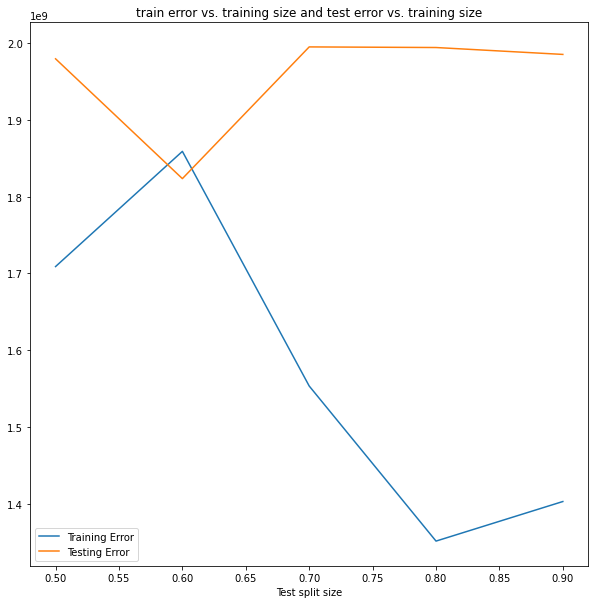

In [8]:
# Your code here
import matplotlib.pyplot as plt

splits = [0.5, 0.6, 0.7, 0.8, 0.9]

train_mses = []
test_mses = []

for split in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1, test_size=split)

    # Fit transformers
    log_transformer.fit(X_train[continuous])
    ohe.fit(X_train[categoricals])

    # Transform training data
    X_train = pd.concat([
        pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index),
        pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
    ], axis=1)

    # Transform test data
    X_test = pd.concat([
        pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index),
        pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
    ], axis=1)

    # Model fitting on training data
    linreg.fit(X_train, y_train)

    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # MSE
    train_mse_1= mean_squared_error(y_train, y_train_pred)
    train_mses.append(train_mse_1)

    test_mse_1 = mean_squared_error(y_test, y_test_pred)
    test_mses.append(test_mse_1)

#plot two curves (train error vs. training size and test error vs. training size)
fig, ax = plt.subplots(figsize = (10,10))

ax.set_title("train error vs. training size and test error vs. training size")
ax.plot(splits, train_mses,  label='Training Error')
ax.plot(splits, test_mses, label='Testing Error')
ax.set_xlabel("Test split size")
ax.legend()
plt.show()
    

In this case a test size of 0.58 to 0.60 is good for random state = 1, since the model performs better on test data than training data or has the same performance for both datasets.

### Extension

Repeat the previous example, but for each train-test split size, generate 10 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

In [9]:
# Your code here

What's happening here? Evaluate your result!

##  Summary 

Congratulations! You now practiced your knowledge of MSE and used your train-test split skills to validate your model.